In [19]:
!pip install matplotlib

In [2]:
!pip install matplotlib==3.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [1]:
!python --version

Python 3.12.11


In [2]:
!python -m pip install --upgrade pip

In [3]:
import matplotlib
matplotlib.__version__

'3.10.1'

In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import chardet

In [7]:
import pandas as pd

# Cargar el archivo
ruta = '/content/drive/MyDrive/Colab Notebooks/datos_tratados.csv'
df = pd.read_csv(ruta)


In [8]:
# Ver columnas disponibles
print("Columnas del dataset:")
print(df.columns.tolist())

# Ver primeras 5 filas
df.head()


Columnas del dataset:
['customerid', 'churn', 'customer', 'phone', 'internet', 'account']


,customerid,churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Parte 1: Preparación de los Datos**

In [9]:
#Cargar y limpiar los datos
import pandas as pd

# Ruta del archivo
ruta = '/content/drive/MyDrive/Colab Notebooks/datos_tratados.csv'

# Cargar CSV
df = pd.read_csv(ruta)

# Eliminar columna de ID (no aporta al modelo)
df.drop(columns=['customerid'], inplace=True)


In [10]:
#Expandir columnas anidadas (diccionarios)
import ast

# Convertir strings a diccionarios reales
for col in ['customer', 'phone', 'internet', 'account']:
    df[col] = df[col].apply(ast.literal_eval)

# Expandir las columnas
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)

# Unir todo al dataframe principal y eliminar las originales
df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                df_customer, df_phone, df_internet, df_account], axis=1)


In [11]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   churn             7043 non-null   object
 1   gender            7267 non-null   object
 2   SeniorCitizen     7267 non-null   int64 
 3   Partner           7267 non-null   object
 4   Dependents        7267 non-null   object
 5   tenure            7267 non-null   int64 
 6   PhoneService      7267 non-null   object
 7   MultipleLines     7267 non-null   object
 8   InternetService   7267 non-null   object
 9   OnlineSecurity    7267 non-null   object
 10  OnlineBackup      7267 non-null   object
 11  DeviceProtection  7267 non-null   object
 12  TechSupport       7267 non-null   object
 13  StreamingTV       7267 non-null   object
 14  StreamingMovies   7267 non-null   object
 15  Contract          7267 non-null   object
 16  PaperlessBilling  7267 non-null   object
 17  PaymentMethod 

,churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [12]:
df_charges = df['Charges'].apply(pd.Series)
df = pd.concat([df.drop(columns=['Charges']), df_charges], axis=1)


In [13]:
print(df.columns)

Index(['churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Monthly', 'Total'],
      dtype='object')


In [14]:
# 1. Identificar variables categóricas (sin churn)
cat_cols = df.select_dtypes(include='object').columns.drop('churn')
print("Variables categóricas a codificar:", cat_cols)

# 2. Codificar variables categóricas con get_dummies
X = pd.get_dummies(df.drop(columns=['churn']), columns=cat_cols, drop_first=True)

# 3. Crear variable objetivo
y = df['churn'].map({'Yes': 1, 'No': 0})

# 4. Proporción de churn
print("Proporción de churn:")
print(y.value_counts(normalize=True))


Variables categóricas a codificar: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Total'],
      dtype='object')
Proporción de churn:
churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


**Normalización y creación de modelos**

In [15]:
# Verificar valores nulos en y
print("Valores nulos en y:", y.isnull().sum())

# Eliminar filas donde y es NaN (si existen)
df_clean = df[~y.isnull()]
X_clean = X.loc[df_clean.index]
y_clean = y.loc[df_clean.index]

# Ahora sí hacemos el split con los datos limpios
#X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42, stratify=y_clean)


Valores nulos en y: 224


In [16]:
# Eliminar filas donde churn es nulo
df = df[~df['churn'].isnull()]

# Actualizar X y y para que coincidan con el df limpio
X = X.loc[df.index]
y = y.loc[df.index]

# Ahora sí dividir datos
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. División de datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Normalización para modelos que la requieren (LR, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Modelos

# Regresión Logística (normalizado)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Random Forest (sin normalización)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 4. Evaluación

def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("\n")

print_metrics(y_test, y_pred_lr, "Regresión Logística")
print_metrics(y_test, y_pred_rf, "Random Forest")


--- Regresión Logística ---
Accuracy: 0.7728348319924279
Precision: 0.5990220048899756
Recall: 0.43672014260249553
F1-score: 0.5051546391752577
Confusion Matrix:
 [[1388  164]
 [ 316  245]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1552
         1.0       0.60      0.44      0.51       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



--- Random Forest ---
Accuracy: 0.7851396119261713
Precision: 0.6314496314496314
Recall: 0.45811051693404636
F1-score: 0.53099173553719
Confusion Matrix:
 [[1402  150]
 [ 304  257]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1552
         1.0       0.63      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77    

Regresión Logística:
* Accuracy: 77.28%
* Precision (para churn=1): 0.60
* Recall (para churn=1): 0.44
* F1-score (para churn=1): 0.51

Random Forest:
* Accuracy: 78.51%
* Precision (para churn=1): 0.63
* Recall (para churn=1): 0.46
* F1-score (para churn=1): 0.53

**Correlación y Selección de Variables**

In [18]:
print(df.columns)


Index(['churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Monthly', 'Total'],
      dtype='object')


Valores únicos antes: [0 1]
Valores únicos después del mapeo: [0 1]


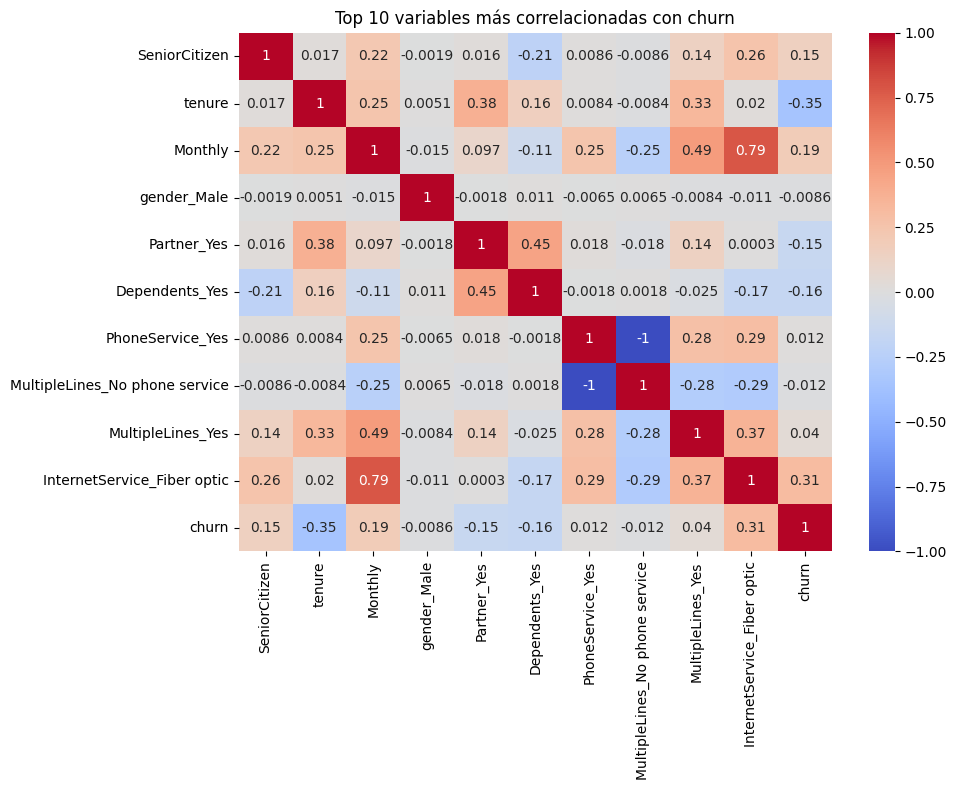


Correlación con churn (ordenado):
SeniorCitizen                           NaN
tenure                                  NaN
Monthly                                 NaN
gender_Male                             NaN
Partner_Yes                             NaN
Dependents_Yes                          NaN
PhoneService_Yes                        NaN
MultipleLines_No phone service          NaN
MultipleLines_Yes                       NaN
InternetService_Fiber optic             NaN
InternetService_No                      NaN
OnlineSecurity_No internet service      NaN
OnlineSecurity_Yes                      NaN
OnlineBackup_No internet service        NaN
OnlineBackup_Yes                        NaN
DeviceProtection_No internet service    NaN
DeviceProtection_Yes                    NaN
TechSupport_No internet service         NaN
TechSupport_Yes                         NaN
StreamingTV_No internet service         NaN
StreamingTV_Yes                         NaN
StreamingMovies_No internet service     N

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paso 1: Verificar y convertir 'churn' a numérico ---
print("Valores únicos antes:", df['churn'].unique())

if df['churn'].dtype == 'object':
    df['churn'] = df['churn'].str.strip().str.lower()
    df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

print("Valores únicos después del mapeo:", df['churn'].unique())

# --- Paso 2: Codificar solo columnas categóricas con pocas categorías ---
low_card_cols = [col for col in df.select_dtypes(include='object').columns
                 if df[col].nunique() <= 10 and col != 'churn']

df_cat = pd.get_dummies(df[low_card_cols], drop_first=True)

# --- Paso 3: Unir columnas numéricas y churn ---
df_num = df.select_dtypes(include='number')
df_encoded = pd.concat([df_num, df_cat], axis=1)

# --- Paso 4: Calcular correlaciones con churn ---
correlations = df_encoded.corr(numeric_only=True).corrwith(df_encoded['churn']).drop('churn')
top_10 = correlations.abs().sort_values(ascending=False).head(10).index

# --- Paso 5: Graficar las 10 variables más correlacionadas con churn ---
cols_to_plot = list(top_10) + ['churn']
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[cols_to_plot].corr(), annot=True, cmap='coolwarm')
plt.title("Top 10 variables más correlacionadas con churn")
plt.tight_layout()
plt.show()

# --- Paso 6: Mostrar orden de correlación ---
print("\nCorrelación con churn (ordenado):")
print(correlations.sort_values(ascending=False))



**Modelado Predictivo de Churn**

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113


=== Confusion Matrix ===
[[1381  171]
 [ 257  304]]

=== ROC AUC ===
AUC: 0.8387033234099639


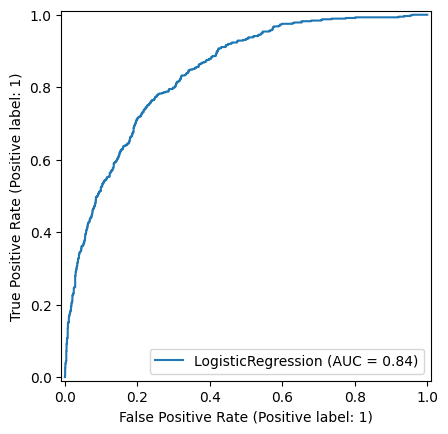

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# 1. Separar features y target
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# 2. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Entrenar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Evaluar en test
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 5. Métricas
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== ROC AUC ===")
print("AUC:", roc_auc_score(y_test, y_proba))

# 6. Curva ROC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


**Interpretaciones y conclusiones**

=== Top 10 Variables Más Relevantes ===
Contract_Two year                -1.240854
InternetService_Fiber optic       0.751022
Contract_One year                -0.721764
PhoneService_Yes                 -0.484632
PaperlessBilling_Yes              0.409552
TechSupport_Yes                  -0.407197
PaymentMethod_Electronic check    0.371636
OnlineSecurity_Yes               -0.293940
MultipleLines_Yes                 0.281107
StreamingTV_Yes                   0.218407
dtype: float64


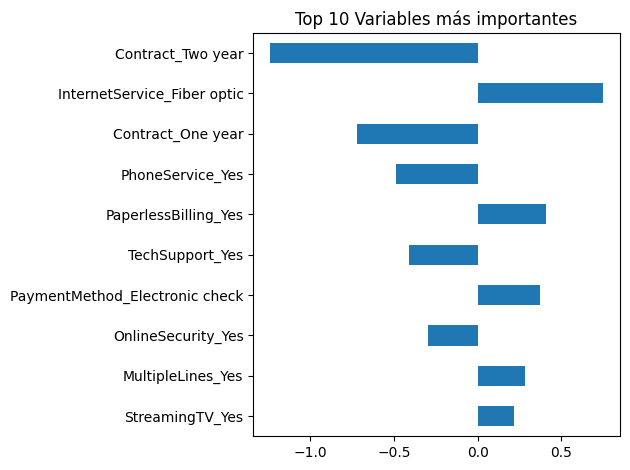

In [22]:
importances = pd.Series(model.coef_[0], index=X.columns)
importances = importances.sort_values(key=abs, ascending=False)

# Mostrar top 10
print("=== Top 10 Variables Más Relevantes ===")
print(importances.head(10))

# Gráfico
importances.head(10).plot(kind='barh', title='Top 10 Variables más importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
